In [2]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

In [4]:
import platform
platstring = platform.platform()

if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2024/"

In [5]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_local_cache(cache_dir=data_root, use_static_cache=True)
# if we needed to download the data we could have used the following line
# cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_root)  

# Get table describing ophys experiments *MOST USEFUL TABLE TO LOOK AT
ophys_experiments = cache.get_ophys_experiment_table()  

print('Number of ophys experiments = {}'.format(len(ophys_experiments)))

# get metadata tables
behavior_sessions = cache.get_behavior_session_table()


ophys_sessions = cache.get_ophys_session_table()


ophys_cells = cache.get_ophys_cells_table()

#print number of items in each table for all imaging and behavioral sessions
print('Number of behavior sessions = {}'.format(len(behavior_sessions)))
print('Number of ophys sessions = {}'.format(len(ophys_sessions)))

import brain_observatory_utilities.datasets.optical_physiology.data_formatting as data_formatting


Number of ophys experiments = 1936
Number of behavior sessions = 4782
Number of ophys sessions = 703


/opt/conda/lib/python3.10/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


In [6]:
behavior_sessions.columns

Index(['ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_plane_group_count', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'num_depths_per_area',
       'ophys_experiment_id', 'num_targeted_structures', 'catch_trial_count',
       'trial_count', 'engaged_trial_count', 'hit_trial_count',
       'miss_trial_count', 'false_alarm_trial_count', 'file_id',
       'correct_reject_trial_count', 'go_trial_count'],
      dtype='object')

In [7]:
behavior_sessions[['mouse_id', 'project_code', 'session_number', 'session_type', 'prior_exposures_to_session_type',
                   'prior_exposures_to_image_set']]
                   

,mouse_id,project_code,session_number,session_type,prior_exposures_to_session_type,prior_exposures_to_image_set
behavior_session_id,,,,,,
870987812,457841,VisualBehaviorMultiscope,<NA>,TRAINING_0_gratings_autorewards_15min,0,<NA>
872953842,457841,VisualBehaviorMultiscope,<NA>,TRAINING_1_gratings,0,<NA>
873774125,457841,VisualBehaviorMultiscope,<NA>,TRAINING_1_gratings,1,<NA>
874790261,457841,VisualBehaviorMultiscope,<NA>,TRAINING_1_gratings,2,<NA>
875207834,457841,VisualBehaviorMultiscope,<NA>,TRAINING_1_gratings,3,<NA>
...,...,...,...,...,...,...
993537991,489066,VisualBehaviorTask1B,2,OPHYS_2_images_B_passive,0,12
993691759,489066,VisualBehaviorTask1B,4,OPHYS_4_images_A,0,0
993959724,489066,VisualBehaviorTask1B,5,OPHYS_5_images_A_passive,0,1


In [8]:
# get all experiments for Project VisualBehaviorMultiscope4areasx2d
behavior_sessions = behavior_sessions[(behavior_sessions.project_code=='VisualBehaviorMultiscope4areasx2d')]

#behavior_sessions = behavior_sessions[(behavior_sessions.project_code=='VisualBehaviorMultiscope4areasx2d')&
#                        (behavior_sessions.session_number==4) &
#                        (ophys_experiment_table.prior_exposures_to_image_set==0)]
print('Number of experiments: {}'.format(len(behavior_sessions)))

Number of experiments: 788


In [9]:
behavior_sessions = behavior_sessions.sort_values(by=['cre_line', 'mouse_id', 'date_of_acquisition'])
behavior_sessions[['mouse_id', 'cre_line', 'sex', 'date_of_acquisition', 'session_type', 'session_number', 'prior_exposures_to_image_set', 'prior_exposures_to_session_type']]

,mouse_id,cre_line,sex,date_of_acquisition,session_type,session_number,prior_exposures_to_image_set,prior_exposures_to_session_type
behavior_session_id,,,,,,,,
920579876,472271,Slc17a7-IRES2-Cre,M,2019-08-09 11:08:42.700000+00:00,TRAINING_0_gratings_autorewards_15min,<NA>,<NA>,0
921584482,472271,Slc17a7-IRES2-Cre,M,2019-08-12 09:51:03.258000+00:00,TRAINING_1_gratings,<NA>,<NA>,0
922549909,472271,Slc17a7-IRES2-Cre,M,2019-08-13 09:56:37.383000+00:00,TRAINING_1_gratings,<NA>,<NA>,1
923453361,472271,Slc17a7-IRES2-Cre,M,2019-08-14 09:37:06.586000+00:00,TRAINING_1_gratings,<NA>,<NA>,2
924556408,472271,Slc17a7-IRES2-Cre,M,2019-08-15 09:45:01.688000+00:00,TRAINING_1_gratings,<NA>,<NA>,3
...,...,...,...,...,...,...,...,...
1106747269,563234,Vip-IRES-Cre,F,2021-06-01 09:13:39.547000+00:00,OPHYS_5_images_H_passive,5,1,0
1106963518,563234,Vip-IRES-Cre,F,2021-06-02 08:48:47.905000+00:00,OPHYS_6_images_H,6,2,0
1107356081,563234,Vip-IRES-Cre,F,2021-06-04 09:05:22.926000+00:00,OPHYS_4_images_H,4,3,1


In [10]:
# Get only the OPHYS_4 sessions with no prior exposure to the novel image set
subset_behavior_sessions = behavior_sessions[(behavior_sessions.project_code=='VisualBehaviorMultiscope4areasx2d')&
                        (behavior_sessions.session_number==4) &
                        (behavior_sessions.prior_exposures_to_image_set==0)]

# Sort the filtered sessions by genotype,  
subset_behavior_sessions = subset_behavior_sessions.sort_values(by=['cre_line', 'sex', 'mouse_id'])


subset_behavior_sessions[['mouse_id', 'cre_line', 'sex', 'session_type', 'ophys_experiment_id', 'prior_exposures_to_image_set', 'prior_exposures_to_session_type']]

# there are 6 Slc17a7 animals (3F, 3M), 5 Sst animals (1F, 4M), and 6 Vip animals (5F, 1M)

,mouse_id,cre_line,sex,session_type,ophys_experiment_id,prior_exposures_to_image_set,prior_exposures_to_session_type
behavior_session_id,,,,,,,
970691928,481295,Slc17a7-IRES2-Cre,F,OPHYS_4_images_H,NaN,0,0
993817409,484631,Slc17a7-IRES2-Cre,F,OPHYS_4_images_H,"[993891831, 993891832, 993891834, 993891837, 9...",0,0
1039520735,513630,Slc17a7-IRES2-Cre,F,OPHYS_4_images_H,"[1039693311, 1039693314, 1039693315, 103969331...",0,0
962242716,472271,Slc17a7-IRES2-Cre,M,OPHYS_4_images_H,"[962676798, 962676802, 962676805, 962676807, 9...",0,0
966754037,477052,Slc17a7-IRES2-Cre,M,OPHYS_4_images_H,NaN,0,0
977451727,484408,Slc17a7-IRES2-Cre,M,OPHYS_4_images_H,"[977975790, 977975792, 977975794, 977975796, 9...",0,0
1109864540,570949,Sst-IRES-Cre,F,OPHYS_4_images_H,"[1109986147, 1109986150, 1109986151, 110998615...",0,0
993957374,485689,Sst-IRES-Cre,M,OPHYS_4_images_H,"[994082654, 994082656, 994082660, 994082661, 9...",0,0
1059672853,524158,Sst-IRES-Cre,M,OPHYS_4_images_H,[1059792827],0,0


In [11]:
print(subset_behavior_sessions.groupby(['cre_line', 'mouse_id']).count().reset_index().groupby('cre_line').count()[['mouse_id']])
print('\n Total number of sessions:\n', len(subset_behavior_sessions))

                   mouse_id
cre_line                   
Slc17a7-IRES2-Cre         6
Sst-IRES-Cre              5
Vip-IRES-Cre              6

 Total number of sessions:
 17


In [12]:
ophys_experiments.columns

Index(['behavior_session_id', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_depth',
       'targeted_structure', 'targeted_imaging_depth', 'imaging_plane_group',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'passive', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'published_at', 'isi_experiment_id', 'file_id'],
      dtype='object')

In [13]:
# get all experiments for Project VisualBehaviorMultiscope4areasx2d
ophys_experiments = ophys_experiments[(ophys_experiments.project_code=='VisualBehaviorMultiscope4areasx2d')]

#behavior_sessions = behavior_sessions[(behavior_sessions.project_code=='VisualBehaviorMultiscope4areasx2d')&
#                        (behavior_sessions.session_number==4) &
#                        (ophys_experiment_table.prior_exposures_to_image_set==0)]
print('Number of experiments: {}'.format(len(ophys_experiments)))

Number of experiments: 636


In [14]:
ophys_experiments = ophys_experiments.sort_values(by=['cre_line', 'mouse_id', 'date_of_acquisition'])
ophys_experiments[['mouse_id', 'cre_line', 'sex', 'date_of_acquisition', 'session_type', 'session_number', 'prior_exposures_to_image_set', 'prior_exposures_to_session_type']]

,mouse_id,cre_line,sex,date_of_acquisition,session_type,session_number,prior_exposures_to_image_set,prior_exposures_to_session_type
ophys_experiment_id,,,,,,,,
959389424,472271,Slc17a7-IRES2-Cre,M,2019-10-01 11:59:27.955000+00:00,OPHYS_1_images_G,1,15,0
959389426,472271,Slc17a7-IRES2-Cre,M,2019-10-01 11:59:27.955000+00:00,OPHYS_1_images_G,1,15,0
959389428,472271,Slc17a7-IRES2-Cre,M,2019-10-01 11:59:27.955000+00:00,OPHYS_1_images_G,1,15,0
959389431,472271,Slc17a7-IRES2-Cre,M,2019-10-01 11:59:27.955000+00:00,OPHYS_1_images_G,1,15,0
959389434,472271,Slc17a7-IRES2-Cre,M,2019-10-01 11:59:27.955000+00:00,OPHYS_1_images_G,1,15,0
...,...,...,...,...,...,...,...,...
1108444645,563234,Vip-IRES-Cre,F,2021-06-09 08:46:25.293000+00:00,OPHYS_5_images_H_passive,5,4,1
1108444647,563234,Vip-IRES-Cre,F,2021-06-09 08:46:25.293000+00:00,OPHYS_5_images_H_passive,5,4,1
1108444642,563234,Vip-IRES-Cre,F,2021-06-09 08:46:25.293000+00:00,OPHYS_5_images_H_passive,5,4,1


In [15]:
# Get only the OPHYS_4 experiments with no prior exposure to the novel image set
subset_ophys_experiments = ophys_experiments[(ophys_experiments.project_code=='VisualBehaviorMultiscope4areasx2d')&
                        (ophys_experiments.session_number==4) &
                        (ophys_experiments.prior_exposures_to_image_set==0)]

# Sort the filtered experiments by genotype, sex, mouse ID
subset_ophys_experiments = subset_ophys_experiments.sort_values(by=['cre_line', 'targeted_structure', 'sex', 'mouse_id'])


subset_ophys_experiments[['cre_line', 'targeted_structure', 'sex', 'mouse_id', 'session_type', 'prior_exposures_to_image_set', 'prior_exposures_to_session_type']]

# there are 6 Slc17a7 animals (3F, 3M), 5 Sst animals (1F, 4M), and 6 Vip animals (5F, 1M)

,cre_line,targeted_structure,sex,mouse_id,session_type,prior_exposures_to_image_set,prior_exposures_to_session_type
ophys_experiment_id,,,,,,,
993891837,Slc17a7-IRES2-Cre,VISal,F,484631,OPHYS_4_images_H,0,0
1039693318,Slc17a7-IRES2-Cre,VISal,F,513630,OPHYS_4_images_H,0,0
1039693320,Slc17a7-IRES2-Cre,VISal,F,513630,OPHYS_4_images_H,0,0
962676807,Slc17a7-IRES2-Cre,VISal,M,472271,OPHYS_4_images_H,0,0
962676811,Slc17a7-IRES2-Cre,VISal,M,472271,OPHYS_4_images_H,0,0
...,...,...,...,...,...,...,...
1010556650,Vip-IRES-Cre,VISp,F,499478,OPHYS_4_images_H,0,0
1089128027,Vip-IRES-Cre,VISp,F,550603,OPHYS_4_images_H,0,0
1089128029,Vip-IRES-Cre,VISp,F,550603,OPHYS_4_images_H,0,0


In [16]:
subset_ophys_experiments.columns

Index(['behavior_session_id', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_depth',
       'targeted_structure', 'targeted_imaging_depth', 'imaging_plane_group',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'passive', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'published_at', 'isi_experiment_id', 'file_id'],
      dtype='object')

In [17]:
# how many imaging planes/mouse of each genotype are in the dataset?
subset_ophys_experiments.groupby(['cre_line', 'mouse_id', 'targeted_structure', 'targeted_imaging_depth']).count().reset_index().groupby(['cre_line', 'mouse_id', 'targeted_structure']).count()[['targeted_imaging_depth']]


targeted_imaging_depth
cre_line          mouse_id targeted_structure                        
Slc17a7-IRES2-Cre 472271   VISal                                    2
                           VISam                                    2
                           VISl                                     2
                           VISp                                     1
                  484408   VISal                                    2
                           VISam                                    2
                           VISl                                     2
                           VISp                                     2
                  484631   VISal                                    1
                           VISam                                    1
                           VISl                                     1
                           VISp                                     2
                  513630   VISal                                    2
                           VISam                                    1
                           VISl                                     2
                           VISp                                     2
Sst-IRES-Cre      485689   VISal                                    2
                           VISam                                    2
                           VISl                                     1
                           VISp                                     2
                  524158   VISal                                    1
                  555970   VISal                                    1
                           VISam                                    1
                           VISl                                     1
                           VISp                                     2
                  570949   VISal                                    2
                           VISam                                    2
                           VISl                                     2
                           VISp                                     2
Vip-IRES-Cre      489065   VISal                                    1
                           VISam                                    1
                           VISl                                     2
                           VISp                                     1
                  499478   VISal                                    2
                           VISam                                    2
                           VISl                                     1
                           VISp                                     2
                  550603   VISal                                    2
                           VISam                                    2
                           VISl                                     2
                           VISp                                     2
                  554115   VISal                                    2
                           VISam                                    2
                           VISl                                     2
                           VISp                                     2

In [18]:
# Get only the slc17a7 experiments with no prior exposure to the novel image set
slc17a7_ophys_experiments = subset_ophys_experiments[(subset_ophys_experiments.cre_line=='Slc17a7-IRES2-Cre')]
slc17a7_ophys_experiments

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
993891837,993817409,993790878,1022733798,484631,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
1039693318,1039520735,1039474951,1037672795,513630,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2020-07-30 11:04:34.174000+00:00,MESO.1,2021-08-12,1023996339,1567
1039693320,1039520735,1039474951,1037672798,513630,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2020-07-30 11:04:34.174000+00:00,MESO.1,2021-08-12,1023996339,1568
962676807,962242716,962045676,1018027733,472271,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,3,2019-10-07 12:46:06.293000+00:00,MESO.1,2021-08-12,910867827,1380
962676811,962242716,962045676,1018027737,472271,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,3,2019-10-07 12:46:06.293000+00:00,MESO.1,2021-08-12,910867827,1381
977975798,977451727,977288921,1018027759,484408,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,4,2019-11-06 09:02:04.020000+00:00,MESO.1,2021-08-12,942701302,315
977975800,977451727,977288921,1018027762,484408,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,4,2019-11-06 09:02:04.020000+00:00,MESO.1,2021-08-12,942701302,316
993891841,993817409,993790878,1022733804,484631,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,493
1039693324,1039520735,1039474951,1037672805,513630,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2020-07-30 11:04:34.174000+00:00,MESO.1,2021-08-12,1023996339,1569


In [19]:
# Get only the Sst experiments
sst_ophys_experiments = subset_ophys_experiments[(subset_ophys_experiments.cre_line=='Sst-IRES-Cre')]

# Get only the Vip experiments
vip_ophys_experiments = subset_ophys_experiments[(subset_ophys_experiments.cre_line=='Vip-IRES-Cre')]


In [20]:
# Create a list containing the different cell type subsets
celltype_exp_list = [slc17a7_ophys_experiments, sst_ophys_experiments, vip_ophys_experiments]

In [21]:
vip_ophys_experiments.groupby(['cre_line', 'mouse_id', 'targeted_structure', 'targeted_imaging_depth']).count().reset_index().groupby(['cre_line', 'mouse_id', 'targeted_structure']).count()[['targeted_imaging_depth']]


targeted_imaging_depth
cre_line     mouse_id targeted_structure                        
Vip-IRES-Cre 489065   VISal                                    1
                      VISam                                    1
                      VISl                                     2
                      VISp                                     1
             499478   VISal                                    2
                      VISam                                    2
                      VISl                                     1
                      VISp                                     2
             550603   VISal                                    2
                      VISam                                    2
                      VISl                                     2
                      VISp                                     2
             554115   VISal                                    2
                      VISam                                    2
                      VISl                                     2
                      VISp                                     2

In [22]:
# Find the unique session IDs (each session ID is a recording containing all regions/fields of view for one animal)
slc17a7_session_ids = slc17a7_ophys_experiments.ophys_session_id.unique()
slc17a7_exp_ids = np.array(slc17a7_ophys_experiments.index)

sst_session_ids = sst_ophys_experiments.ophys_session_id.unique()

vip_session_ids = vip_ophys_experiments.ophys_session_id.unique()

In [23]:
slc17a7_exp_ids

array([ 993891837, 1039693318, 1039693320,  962676807,  962676811,
        977975798,  977975800,  993891841, 1039693324,  962676815,
        962676817,  977975802,  977975804,  993891834, 1039693315,
       1039693317,  962676802,  962676805,  977975794,  977975796,
        993891831,  993891832, 1039693311, 1039693314,  962676798,
        977975790,  977975792])

In [24]:
slc17a7_session_ids

<IntegerArray>
[993790878, 1039474951, 962045676, 977288921]
Length: 4, dtype: Int64

In [25]:
slc17a7_ophys_experiments

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
993891837,993817409,993790878,1022733798,484631,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
1039693318,1039520735,1039474951,1037672795,513630,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2020-07-30 11:04:34.174000+00:00,MESO.1,2021-08-12,1023996339,1567
1039693320,1039520735,1039474951,1037672798,513630,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2020-07-30 11:04:34.174000+00:00,MESO.1,2021-08-12,1023996339,1568
962676807,962242716,962045676,1018027733,472271,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,3,2019-10-07 12:46:06.293000+00:00,MESO.1,2021-08-12,910867827,1380
962676811,962242716,962045676,1018027737,472271,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,3,2019-10-07 12:46:06.293000+00:00,MESO.1,2021-08-12,910867827,1381
977975798,977451727,977288921,1018027759,484408,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,4,2019-11-06 09:02:04.020000+00:00,MESO.1,2021-08-12,942701302,315
977975800,977451727,977288921,1018027762,484408,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),M,...,False,Novel 1,0,0,4,2019-11-06 09:02:04.020000+00:00,MESO.1,2021-08-12,942701302,316
993891841,993817409,993790878,1022733804,484631,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,493
1039693324,1039520735,1039474951,1037672805,513630,GCaMP6f,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,"[Slc17a7-IRES2-Cre, Camk2a-tTA]",Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),F,...,False,Novel 1,0,0,4,2020-07-30 11:04:34.174000+00:00,MESO.1,2021-08-12,1023996339,1569


In [46]:
# Build desired events/dff/behavior table for a single animal
ophys_experiment_id = 1039693318


# Load the data for this ophys experiment from the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

# Get all the data we need from this ophys experiment

# Get normalized fluorescence traces
dff_traces = ophys_experiment.dff_traces.copy()

# Get deconvolved events
events = ophys_experiment.events.copy()

# Get timestamps 
ophys_timestamps = ophys_experiment.ophys_timestamps.copy()

# Get stimulus presentations
stimulus_presentations = ophys_experiment.stimulus_presentations.copy()

/opt/conda/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [47]:
# Add a column for whether the previous image was novel
stimulus_presentations['prev_image_novel'] = stimulus_presentations['is_image_novel'].shift(1)

In [48]:
# Get stimulus aligned responses for all cells in this dataset
stim_response_dff = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='dff', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=None)



100%|██████████| 136/136 [00:06<00:00, 21.80it/s]


In [49]:
# Get stimulus aligned responses for all cells in this dataset
stim_response_events = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='events', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=None)

100%|██████████| 136/136 [00:06<00:00, 21.57it/s]


In [50]:
# Rename the trace columns to be specific to dff
stim_response_dff.rename(columns={"trace": "dff_trace", "mean_response": "dff_mean_response", 
                                  "baseline_response": "dff_baseline_response"}, inplace=True)

In [51]:
# Add the events trace columns to the stim_response_dff data frame
stim_response_dff['events_trace'] = stim_response_events['trace']
stim_response_dff['events_mean_response'] = stim_response_events['mean_response']
stim_response_dff['events_baseline_response'] = stim_response_events['baseline_response']

In [52]:
#stim_response_dff.sort_values(by=['stimulus_presentations_id', 'cell_specimen_id'])
#stim_response_events.sort_values(by=['stimulus_presentations_id', 'cell_specimen_id'])


# Merge the stimulus response dataframe with the stimulus table to get information about what stimuli were presented 
stim_response_dff = stim_response_dff.merge(stimulus_presentations, on='stimulus_presentations_id')

In [53]:

stim_response_dff

,stimulus_presentations_id,cell_specimen_id,dff_trace,trace_timestamps,dff_mean_response,dff_baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,is_sham_change,active,stimulus_name,prev_image_novel
0,19,1120093651,"[0.10154877893155363, 0.10154877893155363, 0.1...","[-1.0, -0.9993122977226745, -0.998624595445349...",0.097529,0.031599,0.0,11.0,dff,changes,...,True,True,False,-99,0,4,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
1,19,1120093729,"[-0.04725057533639139, -0.04725057533639139, -...","[-1.0, -0.9993122977226745, -0.998624595445349...",-0.064833,-0.017207,0.0,11.0,dff,changes,...,True,True,False,-99,0,4,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
2,19,1120094041,"[0.1128429139438129, 0.1128429139438129, 0.112...","[-1.0, -0.9993122977226745, -0.998624595445349...",0.036272,-0.054641,0.0,11.0,dff,changes,...,True,True,False,-99,0,4,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
3,19,1120094360,"[0.06747794115978684, 0.06747794115978684, 0.0...","[-1.0, -0.9993122977226745, -0.998624595445349...",0.821635,0.477966,0.0,11.0,dff,changes,...,True,True,False,-99,0,4,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
4,19,1120094395,"[0.23161035096423177, 0.23161035096423177, 0.2...","[-1.0, -0.9993122977226745, -0.998624595445349...",0.057389,0.018646,0.0,11.0,dff,changes,...,True,True,False,-99,0,4,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,4786,1120112331,"[0.43030635721239985, 0.43030635721239985, 0.4...","[-1.0, -0.9993122977226745, -0.998624595445349...",-0.053908,-0.065291,0.0,11.0,dff,changes,...,True,False,False,-99,0,973,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
25972,4786,1120112383,"[-0.07244262127076588, -0.07244262127076588, -...","[-1.0, -0.9993122977226745, -0.998624595445349...",0.001602,0.007976,0.0,11.0,dff,changes,...,True,False,False,-99,0,973,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
25973,4786,1120112426,"[-0.22404016092866774, -0.22404016092866774, -...","[-1.0, -0.9993122977226745, -0.998624595445349...",-0.053107,-0.031839,0.0,11.0,dff,changes,...,True,False,False,-99,0,973,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True
25974,4786,1120112551,"[0.09526801352019634, 0.09526801352019634, 0.0...","[-1.0, -0.9993122977226745, -0.998624595445349...",-0.004767,-0.074451,0.0,11.0,dff,changes,...,True,False,False,-99,0,973,False,True,Natural_Images_Lum_Matched_set_ophys_H_2019,True


In [61]:
stim_response_dff.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'dff_trace',
       'trace_timestamps', 'dff_mean_response', 'dff_baseline_response',
       'p_value_gray_screen', 'ophys_frame_rate', 'data_type', 'event_type',
       'interpolate', 'output_sampling_rate', 'response_window_duration',
       'events_trace', 'events_mean_response', 'events_baseline_response',
       'stimulus_block', 'stimulus_block_name', 'image_index', 'image_name',
       'movie_frame_index', 'duration', 'start_time', 'end_time',
       'start_frame', 'end_frame', 'is_change', 'is_image_novel', 'omitted',
       'movie_repeat', 'flashes_since_change', 'trials_id', 'is_sham_change',
       'active', 'stimulus_name', 'prev_image_novel', 'ophys_experiment_id'],
      dtype='object')

In [54]:
stim_response_dff['ophys_experiment_id'] = ophys_experiment_id


In [55]:
stim_response_stack = stim_response_dff.merge(subset_ophys_experiments, left_on='ophys_experiment_id', 
                                              right_index=True, how='left')



In [56]:
stim_response_stack.sort_values(by=['cre_line', 'mouse_id', 'targeted_structure', 'cell_specimen_id'])
stim_response_stack[['cre_line', 'mouse_id', 'targeted_structure', 'cell_specimen_id', 'dff_trace', 'is_change', 'prev_image_novel', 'is_image_novel']]


,cre_line,mouse_id,targeted_structure,cell_specimen_id,dff_trace,is_change,prev_image_novel,is_image_novel
0,Slc17a7-IRES2-Cre,513630,VISal,1120093651,"[0.10154877893155363, 0.10154877893155363, 0.1...",True,True,True
1,Slc17a7-IRES2-Cre,513630,VISal,1120093729,"[-0.04725057533639139, -0.04725057533639139, -...",True,True,True
2,Slc17a7-IRES2-Cre,513630,VISal,1120094041,"[0.1128429139438129, 0.1128429139438129, 0.112...",True,True,True
3,Slc17a7-IRES2-Cre,513630,VISal,1120094360,"[0.06747794115978684, 0.06747794115978684, 0.0...",True,True,True
4,Slc17a7-IRES2-Cre,513630,VISal,1120094395,"[0.23161035096423177, 0.23161035096423177, 0.2...",True,True,True
...,...,...,...,...,...,...,...,...
25971,Slc17a7-IRES2-Cre,513630,VISal,1120112331,"[0.43030635721239985, 0.43030635721239985, 0.4...",True,True,False
25972,Slc17a7-IRES2-Cre,513630,VISal,1120112383,"[-0.07244262127076588, -0.07244262127076588, -...",True,True,False
25973,Slc17a7-IRES2-Cre,513630,VISal,1120112426,"[-0.22404016092866774, -0.22404016092866774, -...",True,True,False
25974,Slc17a7-IRES2-Cre,513630,VISal,1120112551,"[0.09526801352019634, 0.09526801352019634, 0.0...",True,True,False


In [57]:
# Get only the stimulus presentations with image change novel to novel
stim_response_stack_nn = stim_response_stack[(stim_response_stack.prev_image_novel==True)&
                        (stim_response_stack.is_image_novel==True)]

#novel to familiar
stim_response_stack_nf = stim_response_dff[(stim_response_stack.prev_image_novel==True) &
                                         (stim_response_stack.is_image_novel==False)]

#familiar to familiar
stim_response_stack_ff = stim_response_dff[(stim_response_stack.prev_image_novel==False) &
                                         (stim_response_stack.is_image_novel==False)]

#familiar to novel
stim_response_stack_fn = stim_response_dff[(stim_response_stack.prev_image_novel==False) &
                                         (stim_response_stack.is_image_novel==True)]

In [58]:
stim_response_stack_fn.dff_trace.values[4].shape

(2545,)

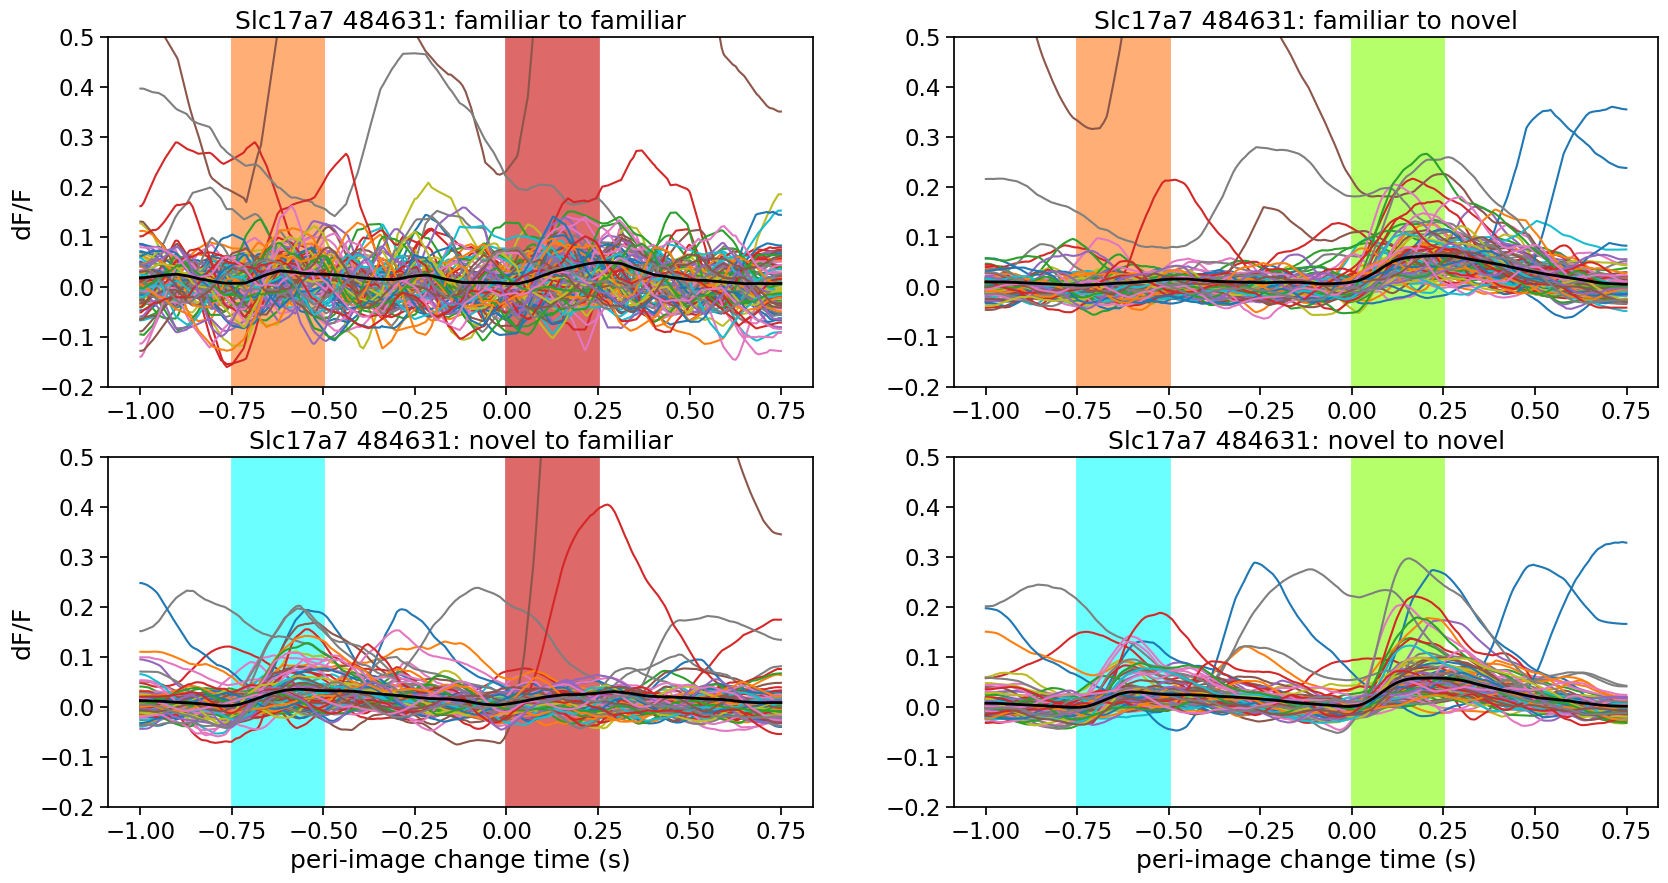

In [55]:
# Plot events for all cells: ∆F/F
fig, ax = plt.subplots(2,2,figsize=(20, 10))

# Plot familiar to familiar transitions
for cell_specimen_id in stim_response_stack_ff.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_ff[stim_response_stack_ff.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[0, 0].plot(timestamps, mean_trace)
    ax[0, 0].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # different familiar image
    ax[0, 0].set_ylim([-0.2, 0.5])
    ax[0, 0].set_ylabel('dF/F')
    ax[0, 0].set_title('Slc17a7 484631: familiar to familiar')

mean_ff_trace = stim_response_stack_ff.dff_trace.mean()
timestamps = stim_response_stack_ff.trace_timestamps.values[0]
ax[0, 0].plot(timestamps, mean_ff_trace, color='black', linewidth=2)

    
    
# Plot familiar to novel transitions
for cell_specimen_id in stim_response_stack_fn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_fn[stim_response_stack_fn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[0, 1].plot(timestamps, mean_trace)
    ax[0, 1].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # novel image
    ax[0, 1].set_ylim([-0.2, 0.5])
    ax[0, 1].set_title('Slc17a7 484631: familiar to novel')
    
mean_fn_trace = stim_response_stack_fn.dff_trace.mean()
timestamps = stim_response_stack_fn.trace_timestamps.values[0]
ax[0, 1].plot(timestamps, mean_fn_trace, color='black', linewidth=2)
    
    
    
# Plot novel to familiar transitions
for cell_specimen_id in stim_response_stack_nf.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nf[stim_response_stack_nf.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[1, 0].plot(timestamps, mean_trace)
    ax[1, 0].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # familiar image
    ax[1, 0].set_ylim([-0.2, 0.5])
    ax[1, 0].set_ylabel('dF/F')
    ax[1, 0].set_xlabel('peri-image change time (s)')
    ax[1, 0].set_title('Slc17a7 484631: novel to familiar')
    
mean_nf_trace = stim_response_stack_nf.dff_trace.mean()
timestamps = stim_response_stack_nf.trace_timestamps.values[0]
ax[1, 0].plot(timestamps, mean_nf_trace, color='black', linewidth=2)    
    
    

# Plot novel to novel transitions
for cell_specimen_id in stim_response_stack_nn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nn[stim_response_stack_nn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.dff_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[1, 1].plot(timestamps, mean_trace)
    ax[1, 1].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # different novel image
    ax[1, 1].set_ylim([-0.2, 0.5])
    ax[1, 1].set_xlabel('peri-image change time (s)')
    ax[1, 1].set_title('Slc17a7 484631: novel to novel')
    
mean_nn_trace = stim_response_stack_nn.dff_trace.mean()
timestamps = stim_response_stack_nn.trace_timestamps.values[0]
ax[1, 1].plot(timestamps, mean_nn_trace, color='black', linewidth=2) 
    
    
    

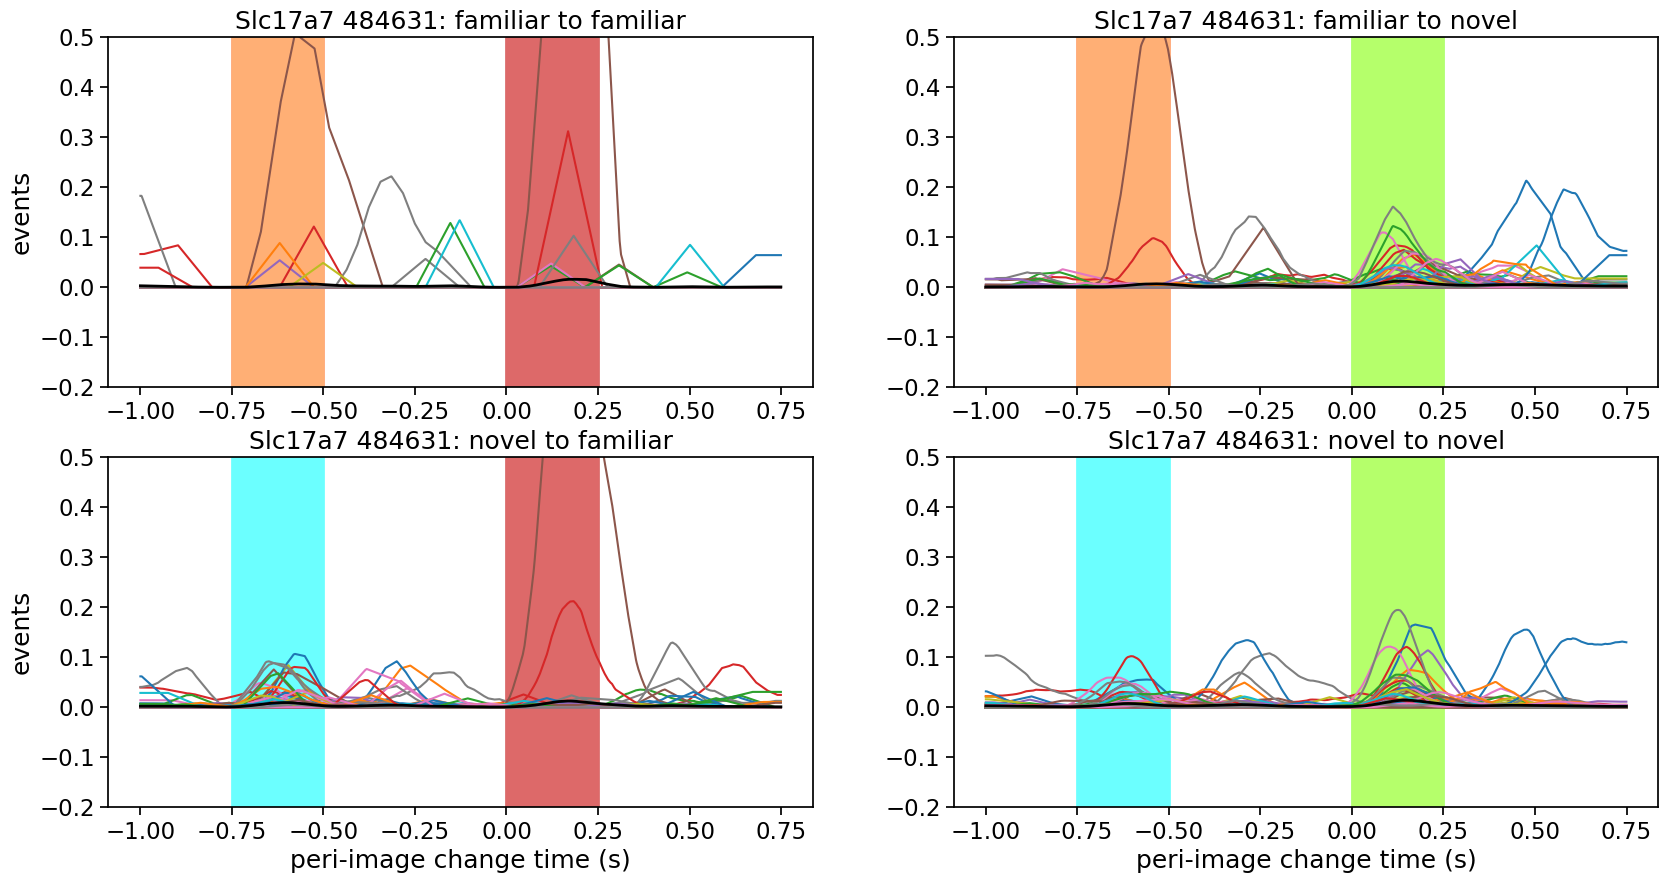

In [57]:
# Plot events for all cells: events
fig, ax = plt.subplots(2,2,figsize=(20, 10))

# Plot familiar to familiar transitions
for cell_specimen_id in stim_response_stack_ff.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_ff[stim_response_stack_ff.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[0, 0].plot(timestamps, mean_trace)
    ax[0, 0].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # different familiar image
    ax[0, 0].set_ylim([-0.2, 0.5])
    ax[0, 0].set_ylabel('events')
    ax[0, 0].set_title('Slc17a7 484631: familiar to familiar')

mean_ff_trace = stim_response_stack_ff.events_trace.mean()
timestamps = stim_response_stack_ff.trace_timestamps.values[0]
ax[0, 0].plot(timestamps, mean_ff_trace, color='black', linewidth=2)

    
    
# Plot familiar to novel transitions
for cell_specimen_id in stim_response_stack_fn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_fn[stim_response_stack_fn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[0, 1].plot(timestamps, mean_trace)
    ax[0, 1].axvspan(-0.75, -0.5, color='#FFAF75', alpha=0.05) # familiar image
    ax[0, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # novel image
    ax[0, 1].set_ylim([-0.2, 0.5])
    ax[0, 1].set_title('Slc17a7 484631: familiar to novel')
    
mean_fn_trace = stim_response_stack_fn.events_trace.mean()
timestamps = stim_response_stack_fn.trace_timestamps.values[0]
ax[0, 1].plot(timestamps, mean_fn_trace, color='black', linewidth=2)
    
    
    
# Plot novel to familiar transitions
for cell_specimen_id in stim_response_stack_nf.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nf[stim_response_stack_nf.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[1, 0].plot(timestamps, mean_trace)
    ax[1, 0].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 0].axvspan(0, 0.25, color='#DD6969', alpha=0.05) # familiar image
    ax[1, 0].set_ylim([-0.2, 0.5])
    ax[1, 0].set_ylabel('events')
    ax[1, 0].set_xlabel('peri-image change time (s)')
    ax[1, 0].set_title('Slc17a7 484631: novel to familiar')
    
mean_nf_trace = stim_response_stack_nf.events_trace.mean()
timestamps = stim_response_stack_nf.trace_timestamps.values[0]
ax[1, 0].plot(timestamps, mean_nf_trace, color='black', linewidth=2)    
    
    

# Plot novel to novel transitions
for cell_specimen_id in stim_response_stack_nn.cell_specimen_id.unique():
    # get the relevant data
    cell_df = stim_response_stack_nn[stim_response_stack_nn.cell_specimen_id==cell_specimen_id]
    # get the average dff trace
    mean_trace = cell_df.events_trace.mean()
    # get the timestamps for one row ()
    timestamps = cell_df.trace_timestamps.values[0]
    ax[1, 1].plot(timestamps, mean_trace)
    ax[1, 1].axvspan(-0.75, -0.5, color='#6BFFFF', alpha=0.05) # novel image
    ax[1, 1].axvspan(0, 0.25, color='#B5FF6B', alpha=0.05) # different novel image
    ax[1, 1].set_ylim([-0.2, 0.5])
    ax[1, 1].set_xlabel('peri-image change time (s)')
    ax[1, 1].set_title('Slc17a7 484631: novel to novel')
    
mean_nn_trace = stim_response_stack_nn.events_trace.mean()
timestamps = stim_response_stack_nn.trace_timestamps.values[0]
ax[1, 1].plot(timestamps, mean_nn_trace, color='black', linewidth=2) 
    
    

In [67]:
# Build desired events/dff/behavior table for a single animal

def get_stacked_change_response(ophys_experiment_id):
    # Load the data for this ophys experiment from the cache
    ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

    # Get stimulus presentations
    stimulus_presentations = ophys_experiment.stimulus_presentations.copy()

    # Add a column for whether the previous image was novel
    stimulus_presentations['prev_image_novel'] = stimulus_presentations['is_image_novel'].shift(1)

    # Get stimulus aligned responses for all cells in this dataset
    stim_response_dff = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='dff', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=None)

    # Get stimulus aligned responses for all cells in this dataset
    stim_response_events = data_formatting.get_stimulus_response_df(ophys_experiment, data_type='events', event_type='changes',
                                                            time_window=[-1, 0.75], response_window_duration=0.25,
                                                            interpolate=True, output_sampling_rate=None)

    # Rename the trace columns to be specific to dff
    stim_response_dff.rename(columns={"trace": "dff_trace", "mean_response": "dff_mean_response", 
                                  "baseline_response": "dff_baseline_response"}, inplace=True)



    # Add the events trace columns to the stim_response_dff data frame
    stim_response_dff['events_trace'] = stim_response_events['trace']
    stim_response_dff['events_mean_response'] = stim_response_events['mean_response']
    stim_response_dff['events_baseline_response'] = stim_response_events['baseline_response']


    # Merge the stimulus response dataframe with the stimulus table to get information about what stimuli were presented 
    stim_response_dff = stim_response_dff.merge(stimulus_presentations, on='stimulus_presentations_id')



    stim_response_dff['ophys_experiment_id'] = ophys_experiment_id


    stim_response_stack = stim_response_dff.merge(subset_ophys_experiments, left_on='ophys_experiment_id', 
                                              right_index=True, how='left')
    return stim_response_stack
    



In [71]:
stacked_data_all = {}
for exp_id in slc17a7_exp_ids:
    stacked_data_all[exp_id]= get_stacked_change_response(exp_id)
    break
    

/opt/conda/lib/python3.10/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
100%|██████████| 136/136 [00:08<00:00, 16.97it/s]


In [73]:
stacked_data_all[993891837]

,stimulus_presentations_id,cell_specimen_id,dff_trace,trace_timestamps,dff_mean_response,dff_baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
0,26,1120095140,"[0.0780651985555568, 0.0780651985555568, 0.078...","[-1.0, -0.99931445952372, -0.9986289190474399,...",0.046287,0.024375,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
1,26,1120095238,"[-0.16474546007582178, -0.16474546007582178, -...","[-1.0, -0.99931445952372, -0.9986289190474399,...",-0.078049,-0.124514,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
2,26,1120095783,"[0.09011350365692353, 0.09011350365692353, 0.0...","[-1.0, -0.99931445952372, -0.9986289190474399,...",0.008965,0.067428,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
3,26,1120095879,"[0.1340801492014635, 0.1340801492014635, 0.134...","[-1.0, -0.99931445952372, -0.9986289190474399,...",0.042397,-0.160915,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
4,26,1120096002,"[-0.010353395707268544, -0.010353395707268544,...","[-1.0, -0.99931445952372, -0.9986289190474399,...",-0.070439,0.027345,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33587,4793,1120120981,"[0.07806041111617656, 0.07806041111617656, 0.0...","[-1.0, -0.99931445952372, -0.9986289190474399,...",0.029228,-0.007643,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
33588,4793,1120121009,"[-0.018769574195634242, -0.018769574195634242,...","[-1.0, -0.99931445952372, -0.9986289190474399,...",-0.053676,-0.029355,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
33589,4793,1120121030,"[0.08587319320852768, 0.08587319320852768, 0.0...","[-1.0, -0.99931445952372, -0.9986289190474399,...",0.043681,-0.044198,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492
33590,4793,1120121051,"[-0.3183247679745126, -0.3183247679745126, -0....","[-1.0, -0.99931445952372, -0.9986289190474399,...",-0.105215,0.026426,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,492


In [70]:
test

,stimulus_presentations_id,cell_specimen_id,dff_trace,trace_timestamps,dff_mean_response,dff_baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
0,26,1120095956,"[-0.047192644689198704, -0.047192644689198704,...","[-1.0, -0.9990486376523297, -0.998097275304659...",0.033562,-0.005433,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
1,26,1120096066,"[-0.17600256034652237, -0.17600256034652237, -...","[-1.0, -0.9990486376523297, -0.998097275304659...",-0.016329,-0.024358,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
2,26,1120096120,"[-0.07466053814607024, -0.07466053814607024, -...","[-1.0, -0.9990486376523297, -0.998097275304659...",0.111486,-0.073543,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
3,26,1120096404,"[-0.11968577501690134, -0.11968577501690134, -...","[-1.0, -0.9990486376523297, -0.998097275304659...",-0.036073,0.100091,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
4,26,1120096488,"[-0.284349894522502, -0.284349894522502, -0.28...","[-1.0, -0.9990486376523297, -0.998097275304659...",0.006080,0.054898,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,4793,1120115830,"[0.004661507268226728, 0.004661507268226728, 0...","[-1.0, -0.9990486376523297, -0.998097275304659...",0.110464,-0.019506,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
24202,4793,1120115849,"[0.0022010360292775994, 0.0022010360292775994,...","[-1.0, -0.9990486376523297, -0.998097275304659...",-0.054571,0.028632,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
24203,4793,1120115988,"[-0.02597064211146195, -0.02597064211146195, -...","[-1.0, -0.9990486376523297, -0.998097275304659...",-0.035943,-0.012962,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
24204,4793,1120116153,"[-0.16812501013054496, -0.16812501013054496, -...","[-1.0, -0.9990486376523297, -0.998097275304659...",-0.000468,-0.057063,0.0,11.0,dff,changes,...,False,Novel 1,0,0,4,2019-12-11 14:12:39.367000+00:00,MESO.1,2021-08-12,943394913,489
